In [157]:
#Libraries used in this project
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

In [11]:
#Write below your data file path
path = "C:/Users/marco/Desktop/Sales.csv"

In [15]:
#Reading data file as it is
df = pd.read_csv(path)
df.head()

,Date,Weekday,Promotions,Holiday,Sales
0,1/1/2022,6,0,0,4033
1,1/2/2022,7,0,1,4012
2,1/3/2022,1,0,0,1608
3,1/4/2022,2,1,0,2046
4,1/5/2022,3,0,0,2484


In [17]:
#Data file general information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Date        365 non-null    object
 1   Weekday     365 non-null    int64 
 2   Promotions  365 non-null    int64 
 3   Holiday     365 non-null    int64 
 4   Sales       365 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 14.4+ KB


In [37]:
#The "Date" column is currently a string datatype
type(df["Date"][0])

str

In [43]:
#Changing the "Date" column datatype to datetime
df["Date"] = pd.to_datetime(df["Date"])
df["Date"]

0     2022-01-01
1     2022-01-02
2     2022-01-03
3     2022-01-04
4     2022-01-05
         ...    
360   2022-12-27
361   2022-12-28
362   2022-12-29
363   2022-12-30
364   2022-12-31
Name: Date, Length: 365, dtype: datetime64[ns]

In [49]:
#The change has been applied
type(df["Date"][0])

pandas._libs.tslibs.timestamps.Timestamp

In [71]:
#Scale the features (independant variables) in a 0-1 range
scale = MinMaxScaler(feature_range=(0,1))

#Select the headers of the columns we want to scale
columns_to_scale = df.drop(["Sales", "Date"], axis = 1).columns

#Scale the data in a range of 0-1 to the DataFrame imported filtered by the feature columns
scaled_data = scale.fit_transform(df[columns_to_scale])

#Create a new DateFrame from the scaled_data array
norm_df = pd.DataFrame(data=scaled_data, columns= columns_to_scale)

#Include "Sales" and "Date" columns to the normalized DataFrame
norm_df["Sales"] = df["Sales"]
norm_df["Date"] = df["Date"]

#The data has been successfully scaled
norm_df.head(3)

,Weekday,Promotions,Holiday,Sales,Date
0,0.833333,0.0,0.0,4033,2022-01-01
1,1.000000,0.0,1.0,4012,2022-01-02
2,0.000000,0.0,0.0,1608,2022-01-03


In [73]:
#Sacaled Data Frame general information
norm_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Weekday     365 non-null    float64       
 1   Promotions  365 non-null    float64       
 2   Holiday     365 non-null    float64       
 3   Sales       365 non-null    int64         
 4   Date        365 non-null    datetime64[ns]
dtypes: datetime64[ns](1), float64(3), int64(1)
memory usage: 14.4 KB


In [311]:
#Independent variables, the features that impact the dependent variable
X = norm_df.drop(["Date","Sales"], axis =1) 

#Dependent variable
y = norm_df["Sales"] 

In [313]:
#Descrpitive statistics
df.describe() 

# The table contains 365 rows, each representing a day in 2022.
# The average sales amount is $2,997.22.
# Weekdays are represented by numbers from 1 to 7, Monday to Sunday.
# The average weekday value is 4, indicating that the data is evenly distributed across the week.
# There are only a few holidays in the dataset.
# Promotions are not applied every day.
# There is an asymmetric distribution of sales.

,Date,Weekday,Promotions,Holiday,Sales
count,365,365.000000,365.000000,365.000000,365.000000
mean,2022-07-01 23:59:59.999999744,4.005479,0.200000,0.142466,2997.219178
min,2022-01-01 00:00:00,1.000000,0.000000,0.000000,1305.000000
25%,2022-04-02 00:00:00,2.000000,0.000000,0.000000,2195.000000
50%,2022-07-02 00:00:00,4.000000,0.000000,0.000000,3074.000000
75%,2022-10-01 00:00:00,6.000000,0.000000,0.000000,3979.000000
max,2022-12-31 00:00:00,7.000000,1.000000,1.000000,4404.000000
std,NaN,2.002738,0.400549,0.350007,942.096284


In [171]:
#Splitting the train and test variables. 80% of the data will be used for training and the rest for testing.
X_train, X_test, y_train, y_test = train_test_split(X,y, train_size=0.8, random_state=42)

M:\Programas\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


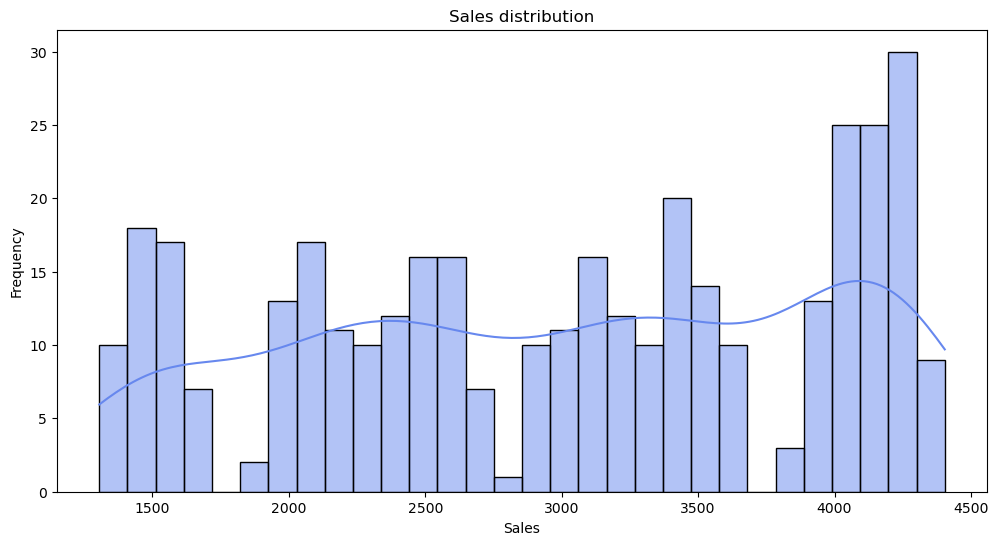

In [119]:
#Sales distribution histogram
plt.figure(figsize=(12,6))
sns.histplot(df["Sales"], bins = 30, kde=True, color= sns.color_palette("coolwarm")[0])
plt.xlabel("Sales")
plt.ylabel("Frequency")
plt.title("Sales distribution");

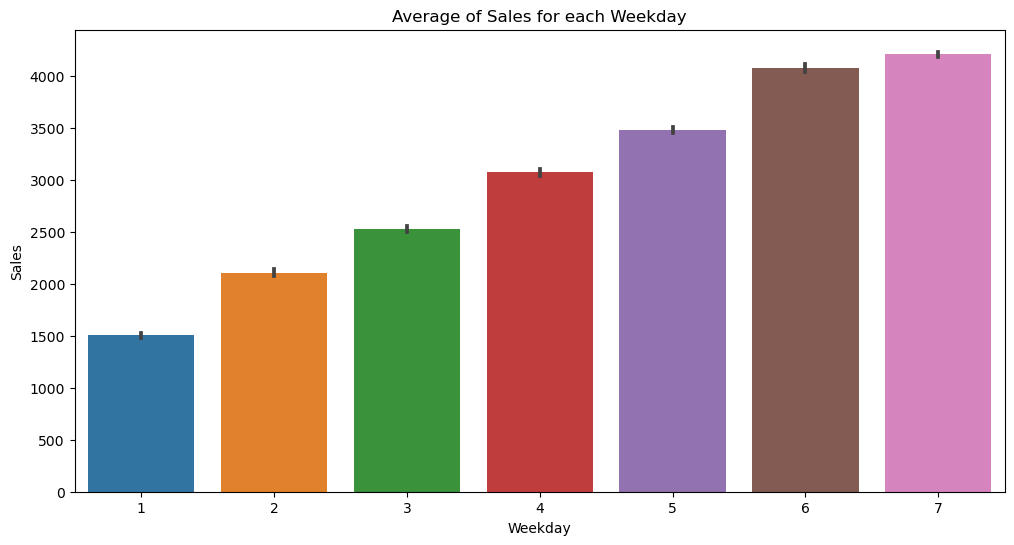

In [349]:
#Relation between Sales and Weekday with avg. Of Sales
plt.figure(figsize=(12,6))
sns.barplot(data=df, x="Weekday", y="Sales")
plt.title("Average of Sales for each Weekday")
plt.xlabel("Weekday")
plt.ylabel("Sales");

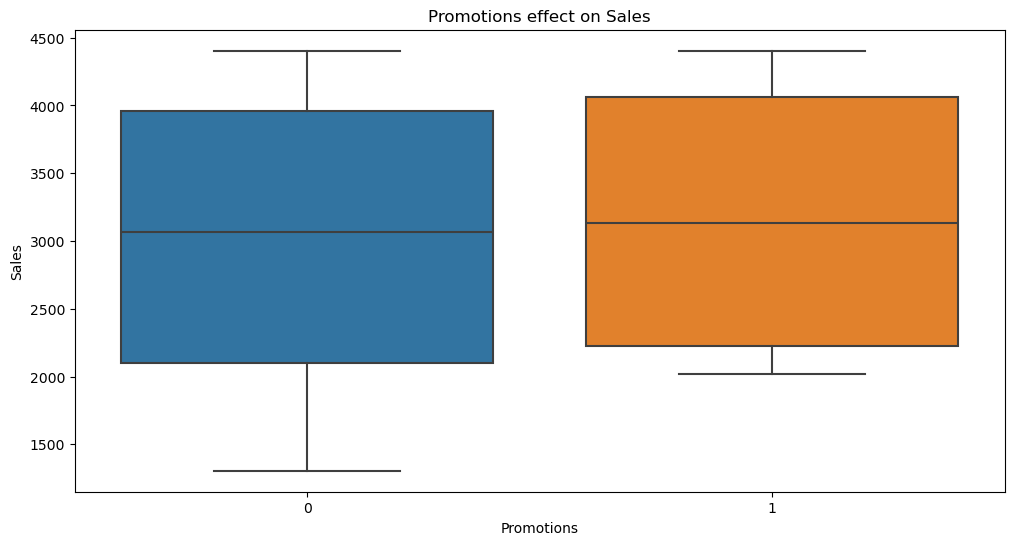

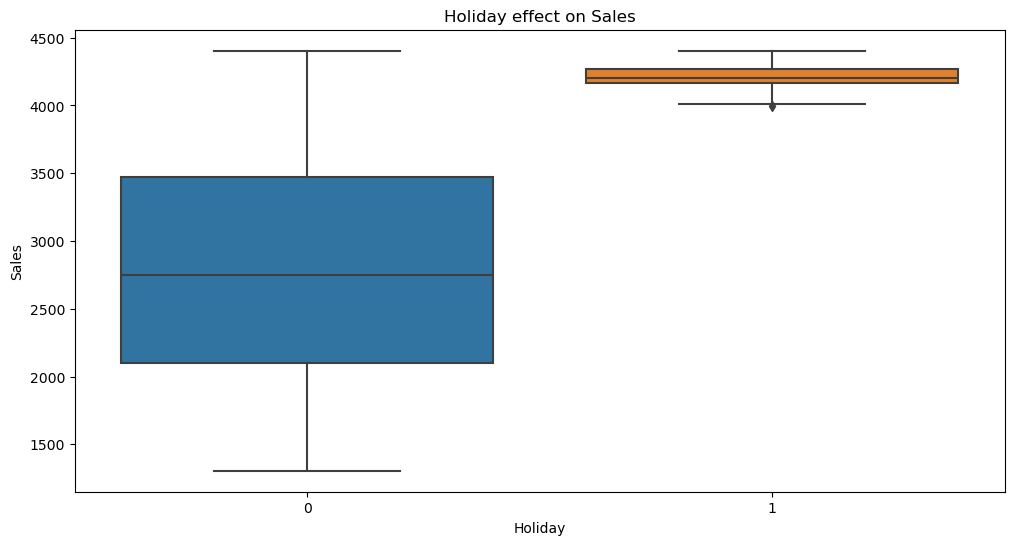

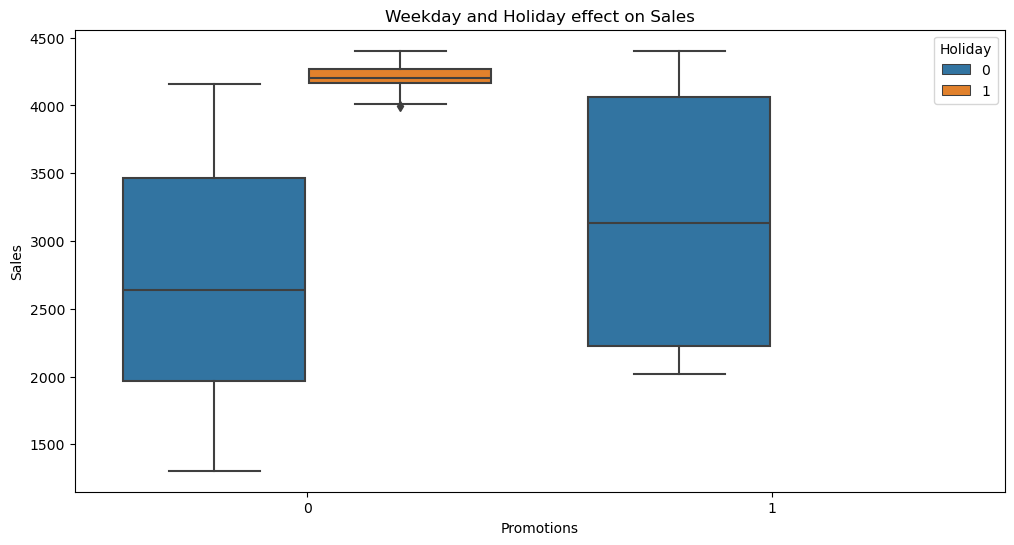

In [347]:
#Boxplots graph to observe the interaction between variables
plt.figure(figsize=(12,6))
sns.boxplot(data=df, x="Promotions", y="Sales")
plt.title("Promotions effect on Sales")

plt.figure(figsize=(12,6))
sns.boxplot(data = df, x="Holiday", y="Sales")
plt.title("Holiday effect on Sales")

plt.figure(figsize=(12,6))
sns.boxplot(data=df, x="Promotions", y ="Sales", hue = "Holiday")
plt.title("Weekday and Holiday effect on Sales");

In [159]:
#Supervised Machine Learning: Model Selection
models = [
    ("Linear Regression", LinearRegression()),
    ("Decision Tree", DecisionTreeRegressor(random_state=42)),
    ("Random Forest", RandomForestRegressor(random_state=42))
     ]

In [325]:
#Training models and displaying their prediction scores
for name, model in models:
    model.fit(X_train, y_train)
    score = model.score(X_test, y_test)
    print(f"{name}: {score:.6f}")

#The best model for the task at hand is Linear Regression, which has a prediction score of 99.24%

Linear Regression: 0.992425
Decision Tree: 0.992351
Random Forest: 0.992310


In [331]:
#Training the selected model
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

#Predicting the dependant variable (Sales) using the X_test data
linear_predictions = linear_model.predict(X_test)

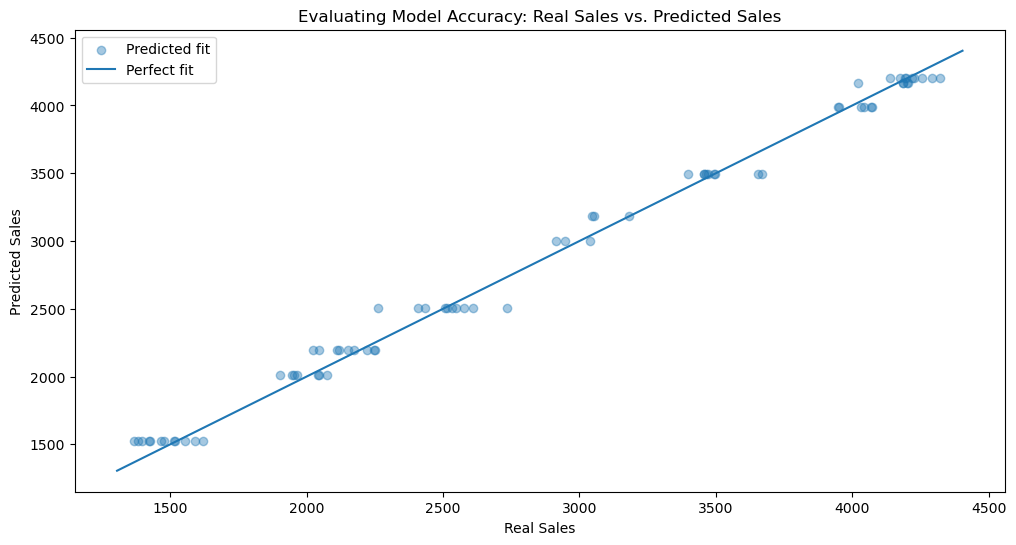

In [339]:
#Evaluating model accuracy
plt.figure(figsize=(12,6))
plt.scatter(x=y_test, y=linear_predictions, alpha = 0.4, label ="Predicted fit")
plt.plot([y.min(), y.max()],[y.min(),y.max()], label="Perfect fit")
plt.xlabel("Real Sales")
plt.ylabel("Predicted Sales")
plt.title("Evaluating Model Accuracy: Real Sales vs. Predicted Sales")
plt.legend();

In [234]:
#Creating a Data Frame using the remaining 20% of the "y" variable and the predictions calculated by the trained model
df_test = pd.DataFrame({"Real":y_test, "Predicted":linear_predictions})
df_test.sort_index(inplace=True) #Sorting the index of the created Data Frame in place

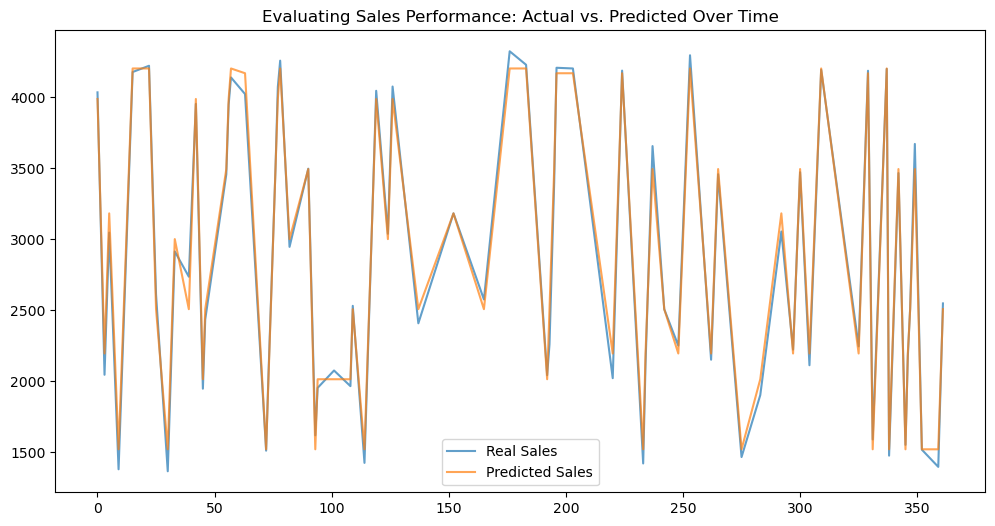

In [243]:
#Sales performance evaluation
plt.figure(figsize=(12,6))
plt.plot(df_test["Real"], label="Real Sales", alpha = 0.7)
plt.plot(df_test["Predicted"], label = "Predicted Sales", alpha = 0.7)
plt.legend()
plt.title("Evaluating Sales Performance: Actual vs. Predicted Over Time");

In [353]:
#Conclusions
# - The "Evaluating Model Accuracy: Real Sales vs. Predicted Sales" graph suggests that the model is perfoming as expected. 
#   The predicted and real values are very close to each other.
# - The "Evaluating Sales Performance: Actual vs. Predict]ed Over Time" graph suggests that there is still a little variation between 
#   the values. This may be related to other not captured values that may help the model to better predict the results.

#Comments
# - Increase personnel on holidays, as sales tend to rise during these days.
# - Investigate additional variables that may influence sales.
# - Optimize inventory to ensure the store has sufficient capacity when demand increases on specific holidays or weekdays.